In [28]:
#! git clone https://github.com/vivekvivs42/DarkflowTry.git
#! wget https://pjreddie.com/media/files/yolov2-tiny.weights

--2019-10-05 23:39:38--  https://pjreddie.com/media/files/yolov2-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44948600 (43M) [application/octet-stream]
Saving to: 'yolov2-tiny.weights’

yolov2-tiny.weights 100%[===================>]  42.87M  3.86MB/s    in 12s     

2019-10-05 23:39:50 (3.70 MB/s) - 'yolov2-tiny.weights’ saved [44948600/44948600]



In [19]:
cd /home/sami/roboticists/Pepper/Model/DarkflowTry

/home/sami/roboticists/Pepper/Model/DarkflowTry


In [31]:
! python3 setup.py build_ext --inplace


running build_ext
copying build/lib.linux-x86_64-3.6/darkflow/cython_utils/nms.cpython-36m-x86_64-linux-gnu.so -> darkflow/cython_utils
copying build/lib.linux-x86_64-3.6/darkflow/cython_utils/cy_yolo2_findboxes.cpython-36m-x86_64-linux-gnu.so -> darkflow/cython_utils
copying build/lib.linux-x86_64-3.6/darkflow/cython_utils/cy_yolo_findboxes.cpython-36m-x86_64-linux-gnu.so -> darkflow/cython_utils


In [32]:
! pip install -e . --user


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Obtaining file:///home/sami/roboticists/Pepper/Model/DarkflowTry
  Found existing installation: darkflow 1.0.0
    Uninstalling darkflow-1.0.0:
      Successfully uninstalled darkflow-1.0.0
  Running setup.py develop for darkflow


In [33]:
! pip install . --user


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Processing /home/sami/roboticists/Pepper/Model/DarkflowTry
  Created wheel for darkflow: filename=darkflow-1.0.0-cp27-cp27mu-linux_x86_64.whl size=803181 sha256=362b4b2005d97ed04c868177568af74827e9879b12cb50988547abeb049b78ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-rGmsNv/wheels/c5/f2/98/d47571159cab9532dfa56fd5f9d0cc652bf09f747e0e8a24b0
Successfully built darkflow
  Found existing installation: darkflow 1.0.0
    Uninstalling darkflow-1.0.0:
      Successfully uninstalled darkflow-1.0.0


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
from darkflow.net.build import TFNet
import cv2


In [2]:
ls

 DarkflowTry/   Object_Detection_With_SSD.ipynb  'Yolov2 Inference .ipynb'
 __init__.py    Yolo_Model.py
 __init__.pyc   Yolo_Model.pyc


In [3]:
options = {"model": "DarkflowTry/cfg/yolov2-tiny.cfg", 
           "load": "DarkflowTry/yolov2-tiny.weights",
           "Train":False,
           "threshold":0.01}

In [4]:
tfnet = TFNet(options)

Parsing DarkflowTry/cfg/yolov2-tiny.cfg
Loading DarkflowTry/yolov2-tiny.weights ...
Successfully identified 44948600 bytes
Finished in 0.0285069942474s


/home/sami/.local/lib/python2.7/site-packages/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2-tiny.cfg not found, use DarkflowTry/cfg/yolov2-tiny.cfg instead
  cfg_path, FLAGS.model))


IOError: [Errno 2] No such file or directory: 'labels.txt'

In [40]:
import pprint as pp
original_img = cv2.imread("/home/sami/roboticists/Pepper/apple.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)
print(results)





[{'topleft': {'y': 0, 'x': 22}, 'confidence': 0.03265028, 'bottomright': {'y': 493, 'x': 582}, 'label': 'person'}, {'topleft': {'y': 33, 'x': 262}, 'confidence': 0.03737373, 'bottomright': {'y': 128, 'x': 464}, 'label': 'kite'}, {'topleft': {'y': 24, 'x': 195}, 'confidence': 0.029716223, 'bottomright': {'y': 188, 'x': 495}, 'label': 'kite'}, {'topleft': {'y': 0, 'x': 61}, 'confidence': 0.010347481, 'bottomright': {'y': 546, 'x': 611}, 'label': 'aeroplane'}, {'topleft': {'y': 25, 'x': 134}, 'confidence': 0.12658525, 'bottomright': {'y': 195, 'x': 469}, 'label': 'spoon'}, {'topleft': {'y': 23, 'x': 30}, 'confidence': 0.26884016, 'bottomright': {'y': 600, 'x': 582}, 'label': 'vase'}, {'topleft': {'y': 98, 'x': 25}, 'confidence': 0.46576238, 'bottomright': {'y': 601, 'x': 591}, 'label': 'apple'}, {'topleft': {'y': 77, 'x': 197}, 'confidence': 0.062101245, 'bottomright': {'y': 176, 'x': 302}, 'label': 'spoon'}, {'topleft': {'y': 22, 'x': 148}, 'confidence': 0.0107480595, 'bottomright': {'y'

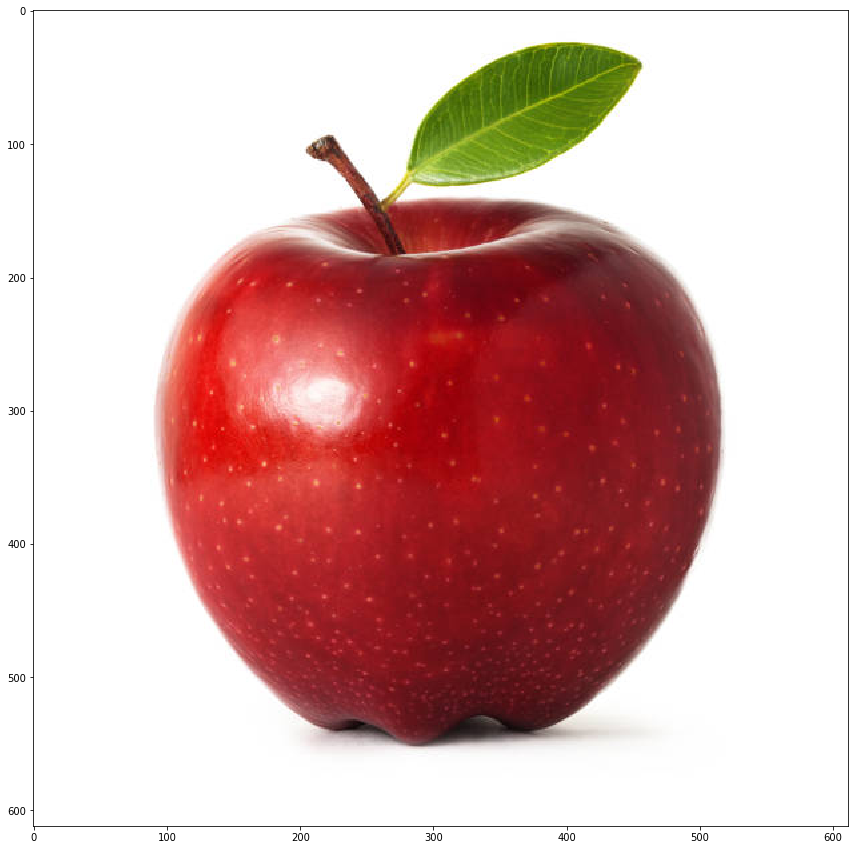

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [10]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.04:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

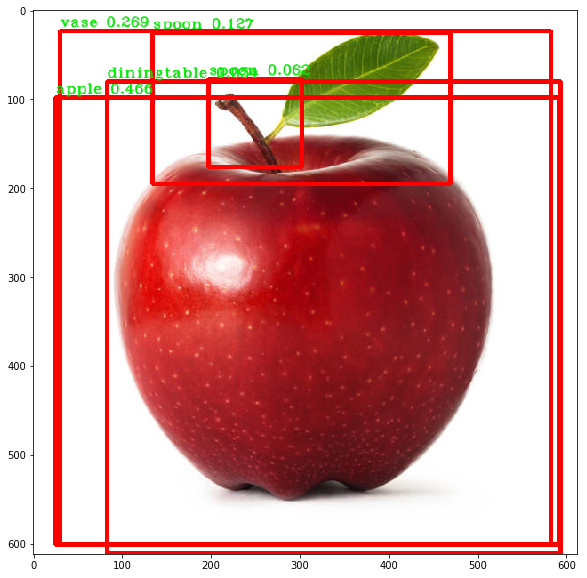

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))